C:\Users\allen\AppData\Local\Temp\ipykernel_10392\1464609157.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Enter the full file path (including filename): C:\Users\allen\CS309\WISECATALOG.txt
Number of objects: 8398


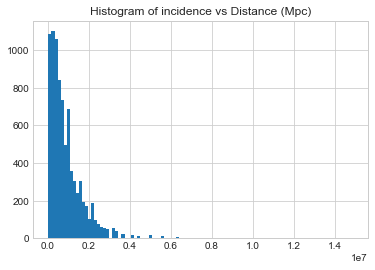

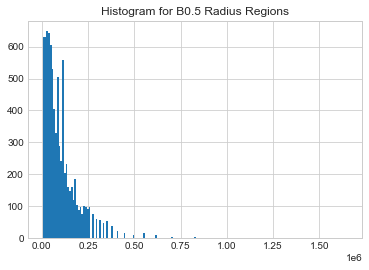

O5 Radius estimation yields 104.584 to 2475.177 Kilo Parsecs
B0.5 Radius estimation yields 11.62 to 275.019 Kilo Parsecs


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import os

# Set the style for matplotlib
plt.style.use('seaborn-whitegrid')

def read_data(filepath):
    """
    Reads data from a file at the given filepath, extracting longitude, latitude, and area information for each object.
    Returns lists of longitude, latitude, and area.
    """
    with open(filepath, 'r') as file:
        objects = file.read().splitlines()

    longitudes = [float(obj[19:25]) for obj in objects[50:]]
    latitudes = [float(obj[27:33]) for obj in objects[50:]]
    areas = [(float(obj[35:38]) * (1 / 3600) * (math.pi / 180)) for obj in objects[50:]]

    return longitudes, latitudes, areas

def calculate_distance(area, radius):
    """
    Calculates distance using the formula 2 * (radius / (2 * math.tan(area / 2))).
    """
    return [2 * (radius / (2 * math.tan(a / 2))) for a in area]

def plot_histogram(data, bins, title):
    """
    Plots a histogram of the data.
    """
    plt.hist(data, bins=bins)
    plt.title(title)
    plt.show()

def estimate_radius(distances):
    """
    Estimates the radius range based on the 5th and 95th percentile of the distances.
    """
    distances.sort()
    lower_bound = int(distances[int(len(distances) * 0.05)]) / 1000
    upper_bound = int(distances[int(len(distances) * 0.95)]) / 1000
    return lower_bound, upper_bound

# Constants
RADIANS = {
    'O5': 108,
    'B0.5': 12
}

if __name__ == "__main__":
    filepath = input("Enter the full file path (including filename): ")

    if not os.path.exists(filepath):
        print("File does not exist. Please check the path and filename.")
    else:
        longitudes, latitudes, areas = read_data(filepath)
        print(f"Number of objects: {len(longitudes)}")

        distO5 = calculate_distance(areas, RADIANS['O5'])
        plot_histogram(distO5, 100, "Histogram of incidence vs Distance (Mpc)")

        distB5 = calculate_distance(areas, RADIANS['B0.5'])
        plot_histogram(distB5, 'auto', "Histogram for B0.5 Radius Regions")

        o5_lower, o5_upper = estimate_radius(distO5)
        print(f'O5 Radius estimation yields {o5_lower} to {o5_upper} Kilo Parsecs')

        b05_lower, b05_upper = estimate_radius(distB5)
        print(f'B0.5 Radius estimation yields {b05_lower} to {b05_upper} Kilo Parsecs')




In [ ]:
C:\Users\allen\CS309\WISECATALOG.txt